# Task 1: Data Preprocessing

Q1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.

Q2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.

Q3.	Use multiple visualizations to understand the hidden patterns in the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mstats, zscore
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import silhouette_score


import warnings
warnings.filterwarnings('ignore')

# Load the EastWestAirlines dataset
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

#### Handling missing values

In [2]:
# Check for any missing values
print("\nMissing values:")
df.isnull().sum()


Missing values:


ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

We can conclude that there are no missing values in this dataset.

In [3]:
# Drop column 'ID#' unnecessary for clustering
df.drop(['ID#'], axis=1, inplace=True)
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 11 columns]

#### Treating Outliers

In [4]:
# Detect outliers using z-score method
z_scores = np.abs(zscore(df))
threshold = 3  # Define a threshold (typically |z-score| > 3 indicates an outlier)

outliers = (z_scores > threshold).any(axis=1)
outlier_rows = df[outliers]

print("Outliers detected using z-score method:")
outlier_rows

Outliers detected using z-score method:


Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
8      443003           0          3          2          1         1753   
43     619393           0          3          1          1        15008   
50     108137           0          1          1          1         6368   
65      53914           0          3          1          1        33767   
70      84409        5031          2          1          1        15436   
...       ...         ...        ...        ...        ...          ...   
3911    55922        2273          1          1          1         8104   
3917   130748           0          4          1          1        65510   
3934    76595           0          1          1          1        10577   
3950    59650           0          1          1          1         5050   
3959    13942           0          1          2          1         5822   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
8              43               3850               12               6948   
43             14                  0                0               7819   
50              5               6368                5               6844   
65             45               5550               29               6826   
70             16               1150                4               7766   
...           ...                ...              ...                ...   
3911           19               4104               16               1552   
3917           37               6349                7               1545   
3934            2               9577                1               1515   
3950           16               3950               13               1476   
3959           12                  0                0               1458   

      Award?  
8          1  
43         1  
50         0  
65         1  
70         0  
...      ...  
3911       0  
3917       0  
3934       0  
3950       0  
3959       0  

[369 rows x 11 columns]

In [5]:
# Treat outliers

# Replace outliers with NaN
df = df.mask(outliers)

# Dropping rows with any missing values
df.dropna(axis=0, inplace=True)

# Display DataFrame after treating outliers
print("DataFrame after treating outliers:")
df

DataFrame after treating outliers:


Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     28143.0         0.0        1.0        1.0        1.0        174.0   
1     19244.0         0.0        1.0        1.0        1.0        215.0   
2     41354.0         0.0        1.0        1.0        1.0       4123.0   
3     14776.0         0.0        1.0        1.0        1.0        500.0   
4     97752.0         0.0        4.0        1.0        1.0      43300.0   
...       ...         ...        ...        ...        ...          ...   
3994  18476.0         0.0        1.0        1.0        1.0       8525.0   
3995  64385.0         0.0        1.0        1.0        1.0        981.0   
3996  73597.0         0.0        3.0        1.0        1.0      25447.0   
3997  54899.0         0.0        1.0        1.0        1.0        500.0   
3998   3016.0         0.0        1.0        1.0        1.0          0.0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0             1.0                0.0              0.0             7000.0   
1             2.0                0.0              0.0             6968.0   
2             4.0                0.0              0.0             7034.0   
3             1.0                0.0              0.0             6952.0   
4            26.0             2077.0              4.0             6935.0   
...           ...                ...              ...                ...   
3994          4.0              200.0              1.0             1403.0   
3995          5.0                0.0              0.0             1395.0   
3996          8.0                0.0              0.0             1402.0   
3997          1.0              500.0              1.0             1401.0   
3998          0.0                0.0              0.0             1398.0   

      Award?  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        1.0  
...      ...  
3994     1.0  
3995     1.0  
3996     1.0  
3997     0.0  
3998     0.0  

[3630 rows x 11 columns]

#### Performing exploratory data analysis (EDA)

In [6]:
# Summary statistics
print("Summary Statistics for the dataset:")
df.describe()

Summary Statistics for the dataset:


Balance   Qual_miles    cc1_miles  cc2_miles  cc3_miles  \
count    3630.000000  3630.000000  3630.000000     3630.0     3630.0   
mean    60519.392562    39.584573     1.997245        1.0        1.0   
std     61882.862343   249.199005     1.319875        0.0        0.0   
min         0.000000     0.000000     1.000000        1.0        1.0   
25%     17481.000000     0.000000     1.000000        1.0        1.0   
50%     39220.000000     0.000000     1.000000        1.0        1.0   
75%     82121.500000     0.000000     3.000000        1.0        1.0   
max    370941.000000  2454.000000     5.000000        1.0        1.0   

        Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count   3630.000000  3630.000000        3630.000000      3630.000000   
mean   14299.180716    10.464187         255.907438         0.785124   
std    18134.266531     8.251370         636.954758         1.818614   
min        0.000000     0.000000           0.000000         0.000000   
25%     1000.000000     3.000000           0.000000         0.000000   
50%     5894.500000    11.000000           0.000000         0.000000   
75%    21631.250000    16.000000         150.000000         1.000000   
max    89360.000000    39.000000        4652.000000        12.000000   

       Days_since_enroll       Award?  
count        3630.000000  3630.000000  
mean         4061.804408     0.340220  
std          2052.901389     0.473848  
min             2.000000     0.000000  
25%          2284.000000     0.000000  
50%          4022.000000     0.000000  
75%          5715.750000     1.000000  
max          8296.000000     1.000000

In [7]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical columns from the dataset:")
numerical_cols

Numerical columns from the dataset:


['Balance',
 'Qual_miles',
 'cc1_miles',
 'cc2_miles',
 'cc3_miles',
 'Bonus_miles',
 'Bonus_trans',
 'Flight_miles_12mo',
 'Flight_trans_12',
 'Days_since_enroll',
 'Award?']

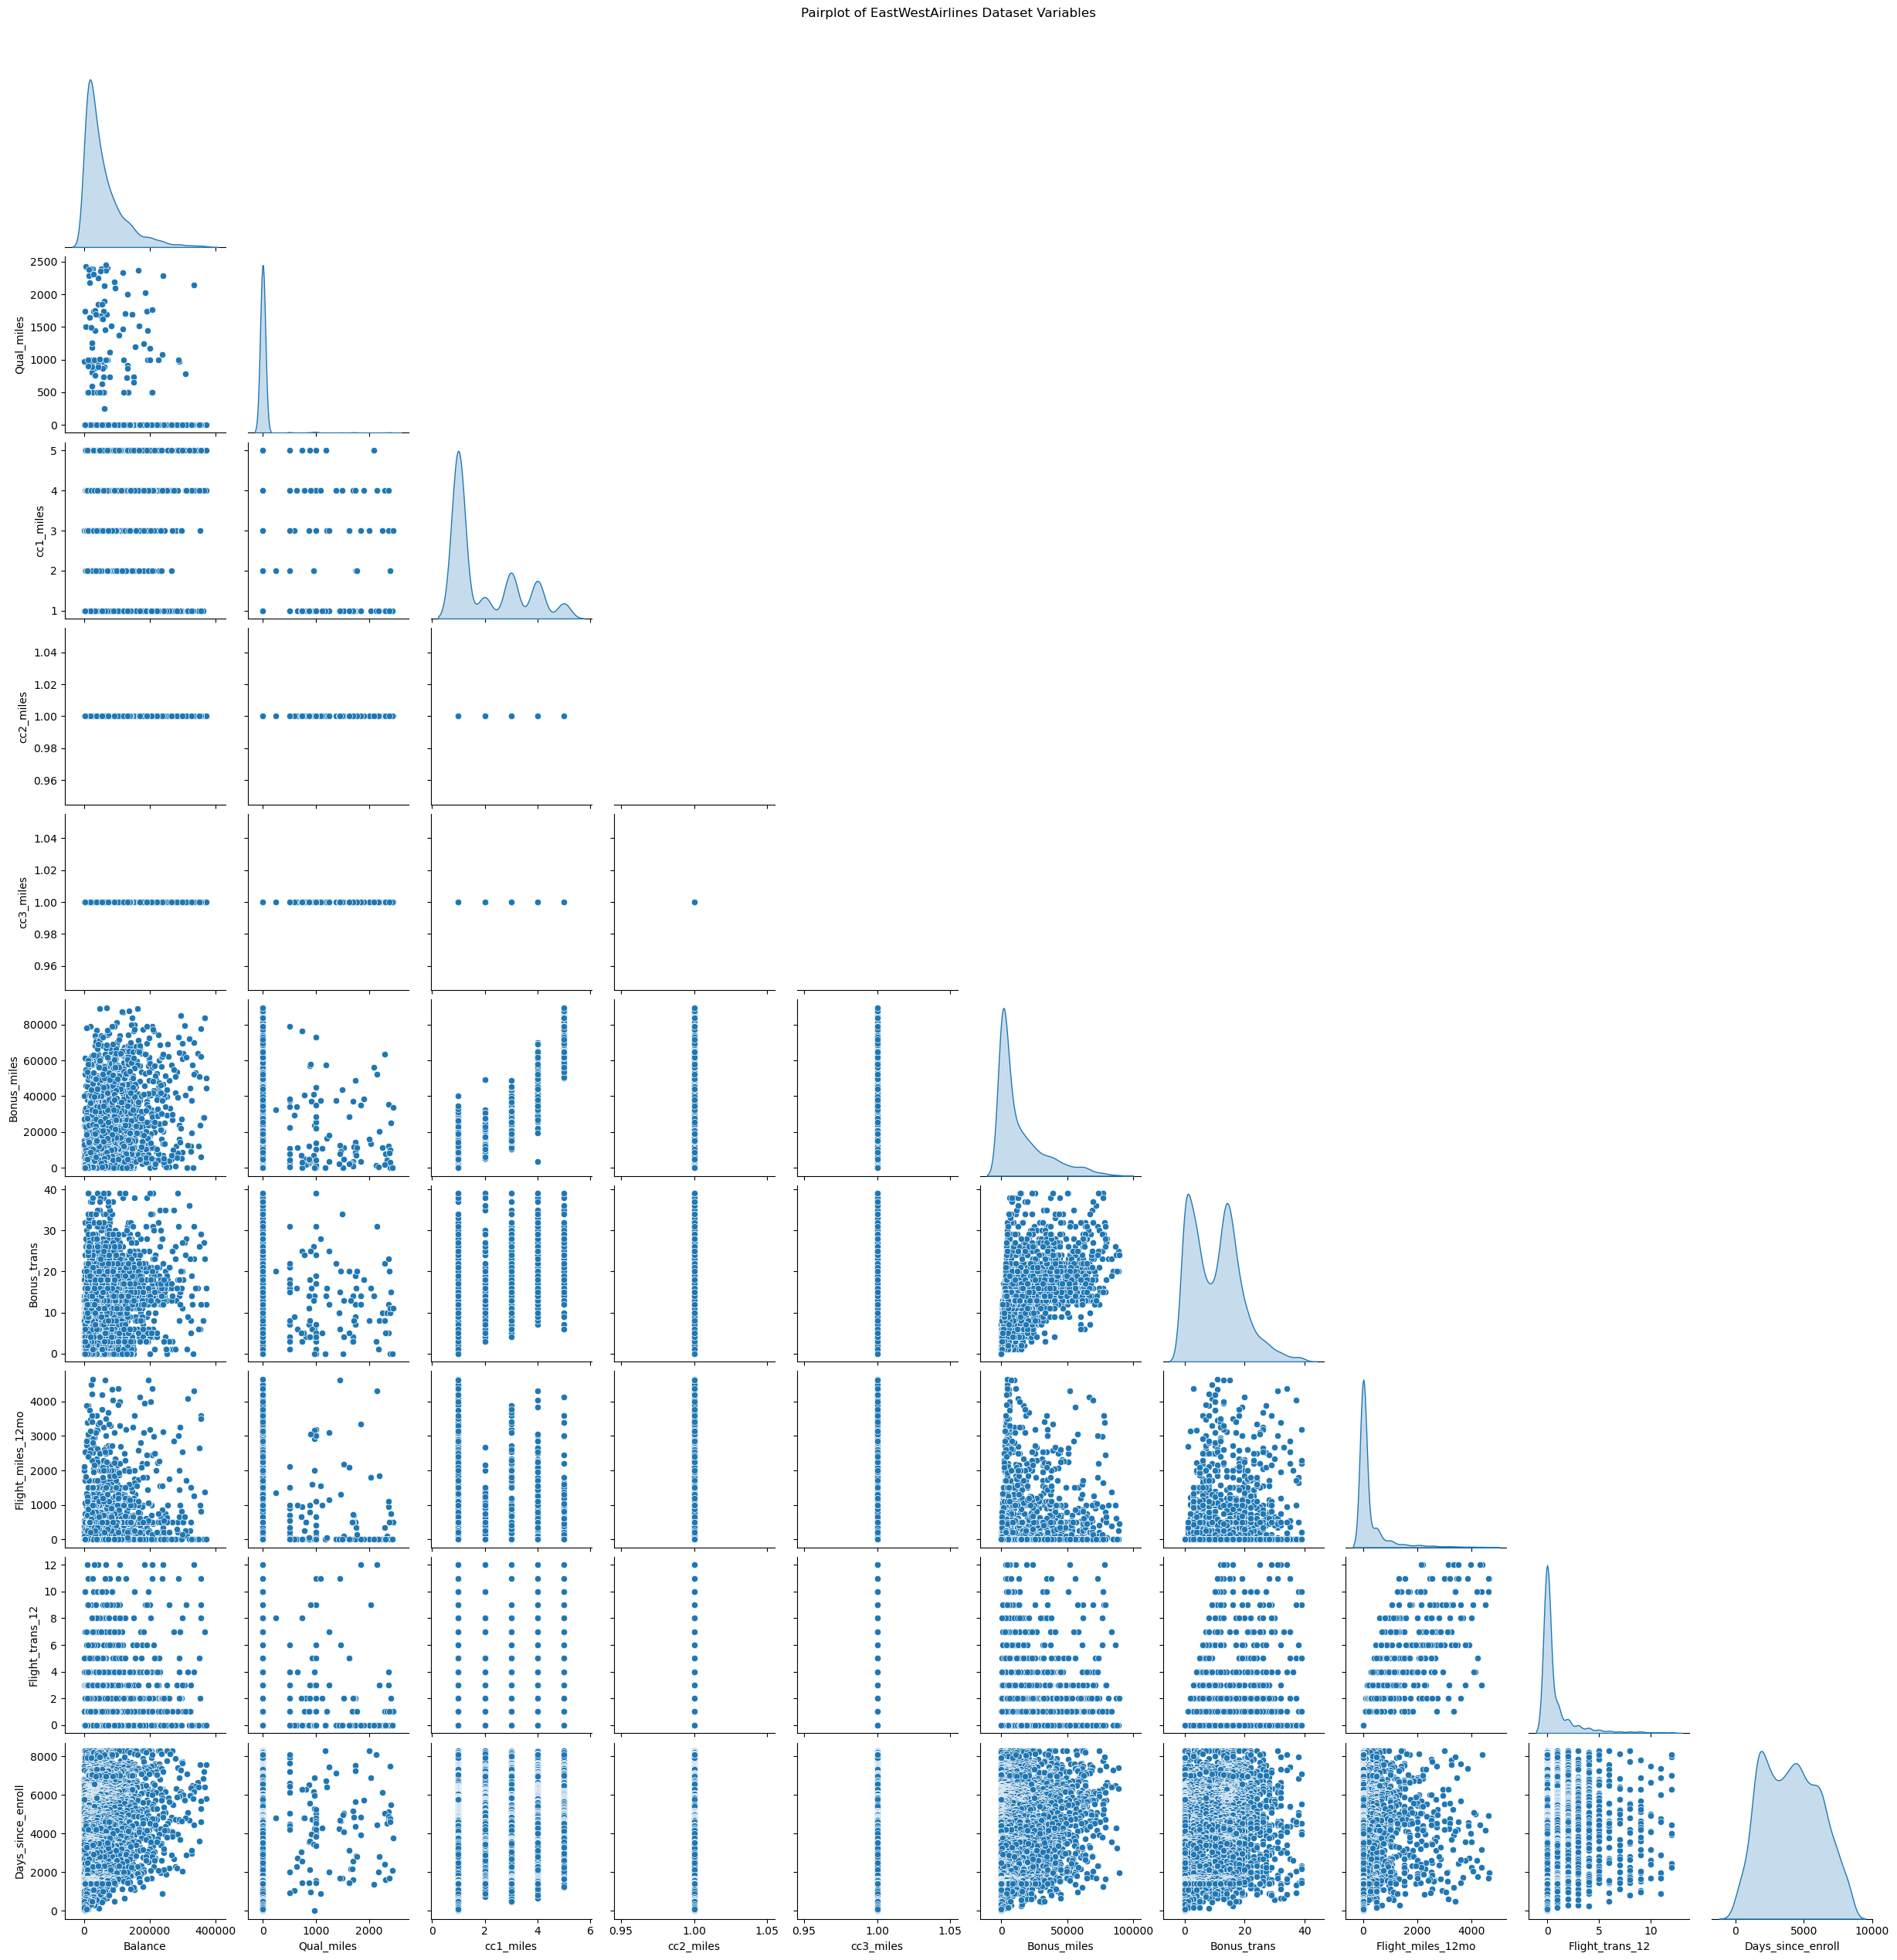

In [8]:
# Pairplot to visualize relationships between numerical variables
sns.pairplot(df.drop(['Award?'], axis=1), diag_kind='kde', corner=True)
plt.suptitle("Pairplot of EastWestAirlines Dataset Variables", y=1.02)
plt.show()

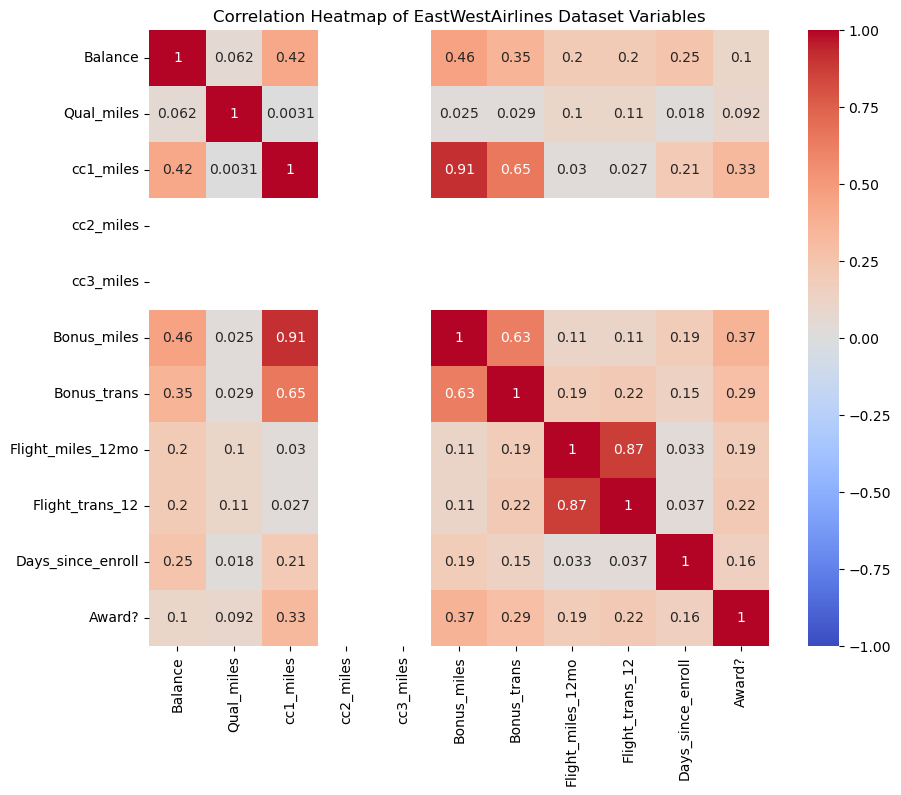

In [9]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of EastWestAirlines Dataset Variables")
plt.show()

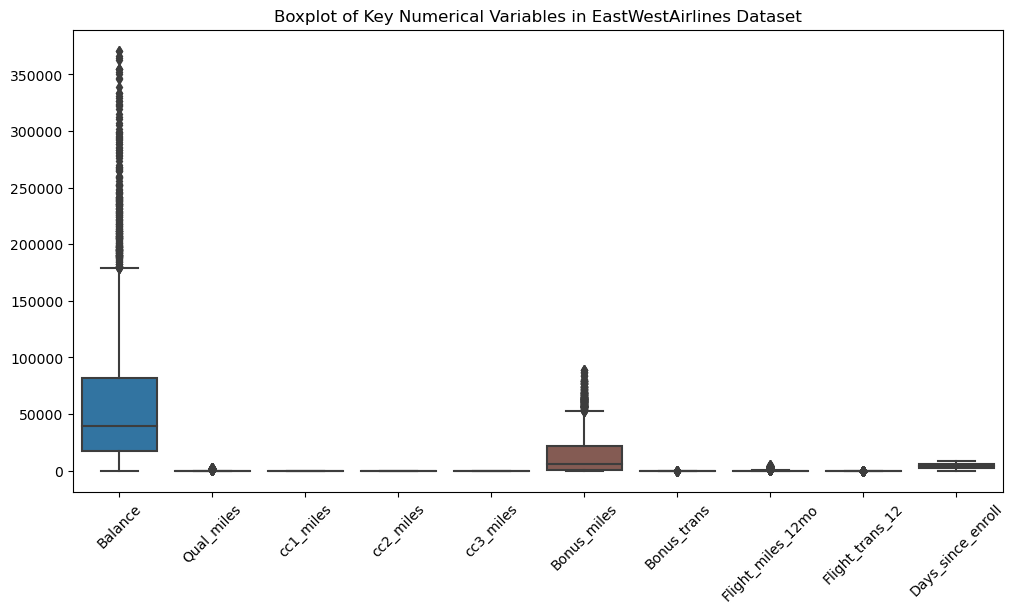

In [10]:
# Boxplot for key numerical variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(['Award?'], axis=1))
plt.title("Boxplot of Key Numerical Variables in EastWestAirlines Dataset")
plt.xticks(rotation=45)
plt.show()

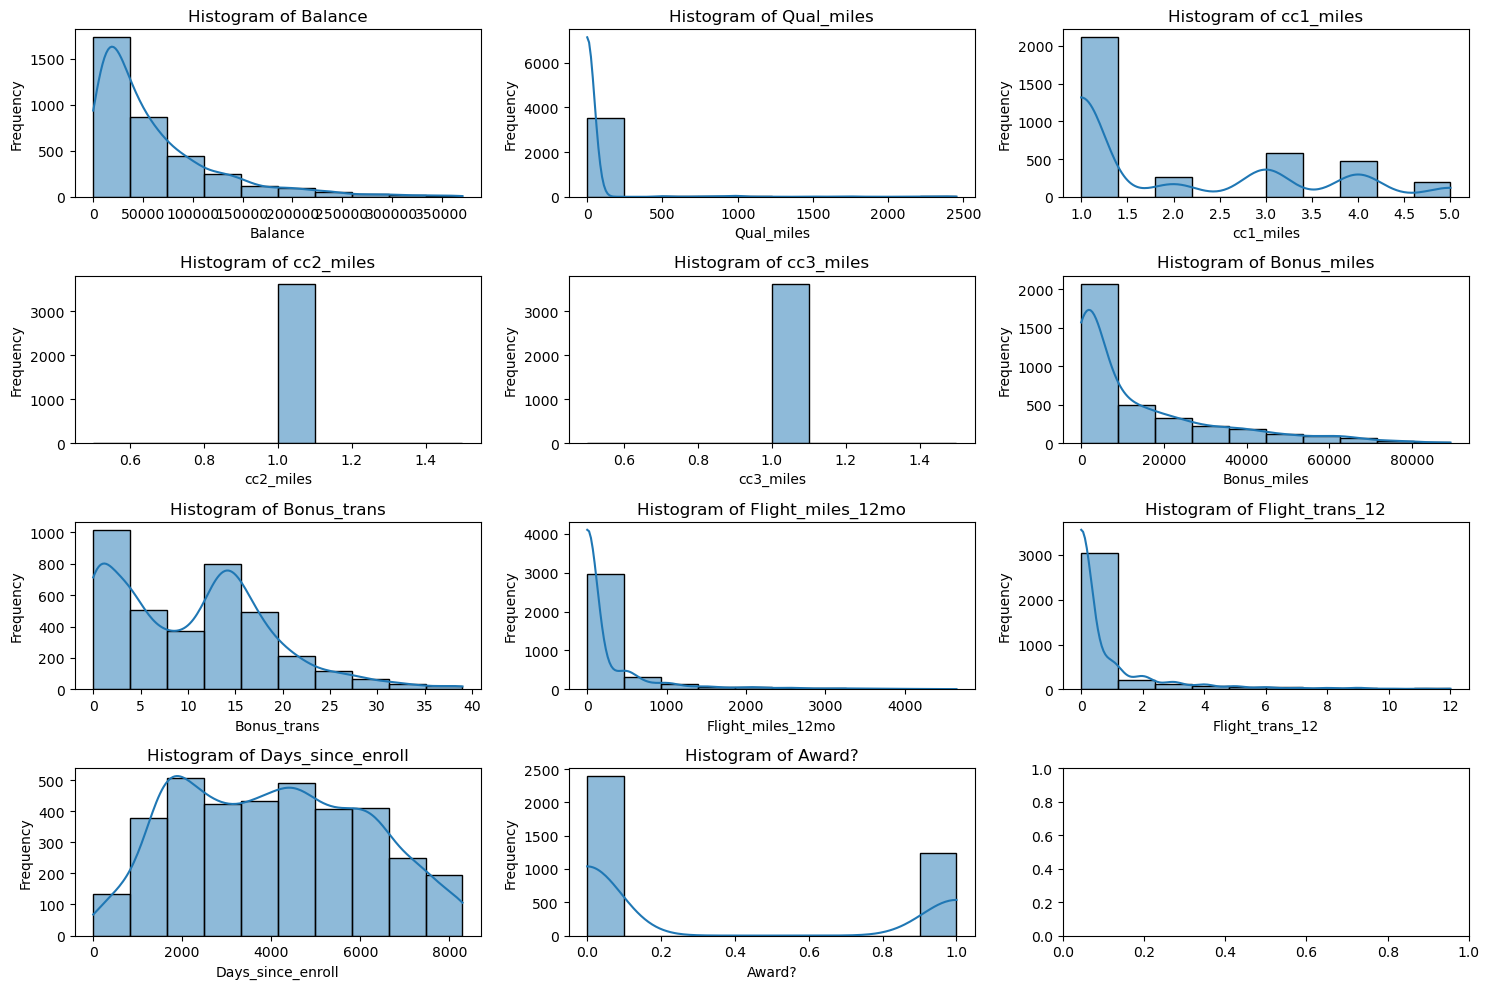

In [11]:
# Histograms of key numerical variables

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))

# Plot histograms for each numerical variable
for i, column in enumerate(df.columns):
    row = i // 3
    col = i % 3
    sns.histplot(df[column], ax=axes[row, col], kde=True, bins=10)  # Adjust bins for better visualization
    axes[row, col].set_title(f'Histogram of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')
# Adjust layout
plt.tight_layout()
plt.show()

# Task 2: Implementing Clustering Algorithms

Q1. Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.

Q2. Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.

Q3. Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

Q4. Visualize the clustering results using scatter plots or other suitable visualization techniques. Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.

In [12]:
# Select relevant columns for clustering (example: Bonus_miles and Balance)
X = df[['Balance', 'Bonus_miles']]

In [13]:
# Standardize the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### K-Means Clustering

In [14]:
# Perform K-Means clustering

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
kmeans_labels = kmeans.labels_

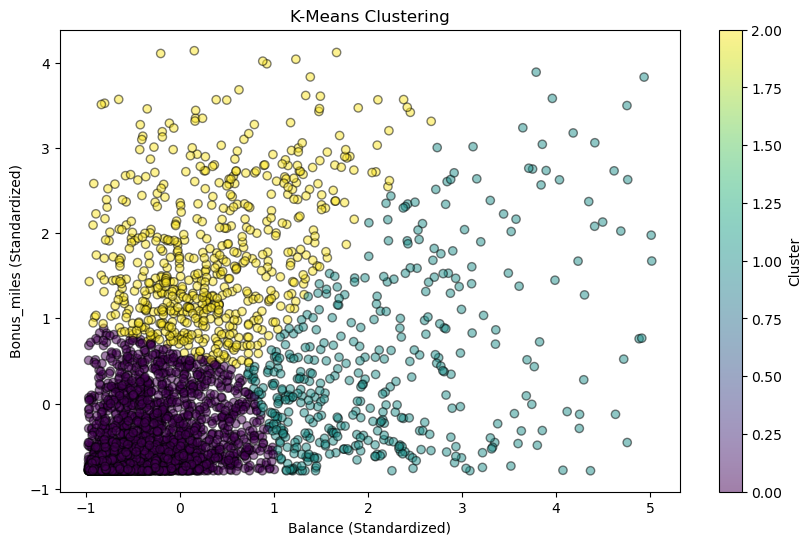

In [15]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5, edgecolors='k')
plt.xlabel('Balance (Standardized)')
plt.ylabel('Bonus_miles (Standardized)')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()

### Hierarchical Clustering

In [16]:
# Perform hierarchical clustering

model = AgglomerativeClustering(n_clusters=None, distance_threshold=7, linkage='ward')
model.fit(X_scaled)
# Obtain cluster labels
clusters = model.labels_

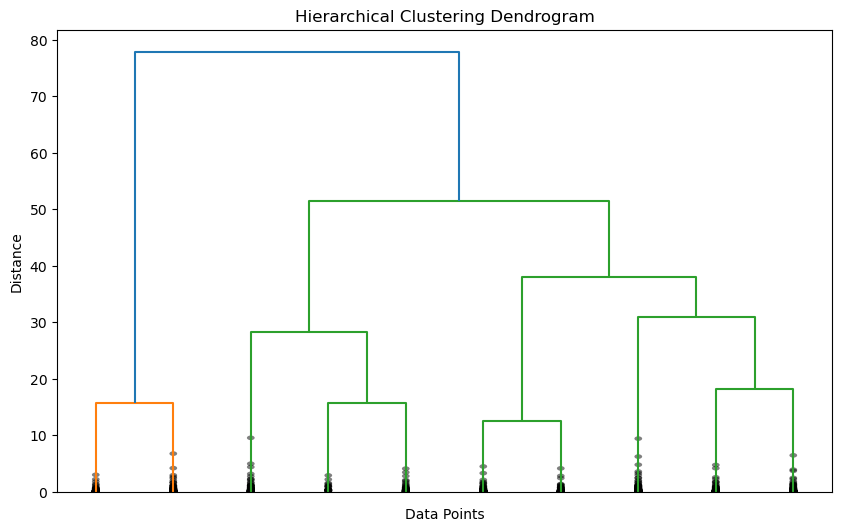

In [17]:
# Plot the dendrogram
plt.figure(figsize=(10, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
dendrogram(
    linkage(X_scaled, method='ward'),
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

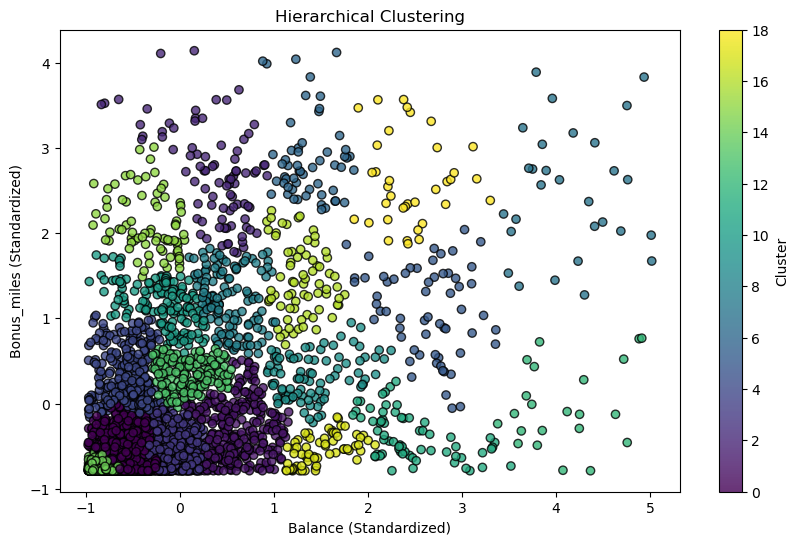

In [20]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.8, edgecolors='k')
plt.title('Hierarchical Clustering')
plt.xlabel('Balance (Standardized)')
plt.ylabel('Bonus_miles (Standardized)')
plt.colorbar(label='Cluster')
plt.show()

### DBSCAN Clustering

In [21]:
# Perform DBSCAN clustering

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_db = dbscan.fit_predict(X_scaled)

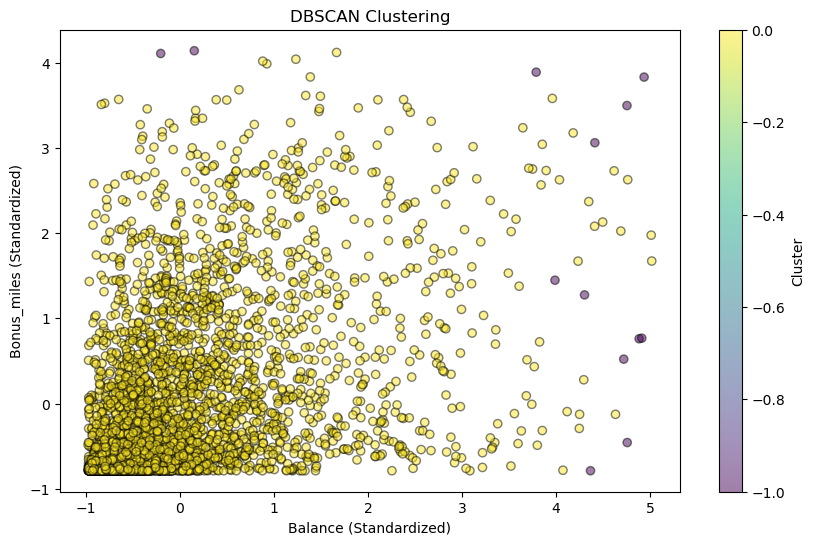

In [22]:
# Visualize the clusters (only for visualization, DBSCAN might not assign all points to clusters)
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_db, cmap='viridis', alpha=0.5, edgecolors='k')
plt.xlabel('Balance (Standardized)')
plt.ylabel('Bonus_miles (Standardized)')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()

### Experimenting with different parameter settings for clustering algorithms

1. For hierarchical clustering - linkage criteria
2. For K-means clustering - Elbow curve for different K values
3. For DBSCAN clustering - epsilon, minPts

#### K-Means Clustering with Elbow Method for Different K Values

In [23]:
# Function to compute inertia for a range of K values
def compute_inertia(X, max_k):
    inertia = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    return inertia


# Compute inertia for different K values
max_k = 10
inertia = compute_inertia(X_scaled, max_k)

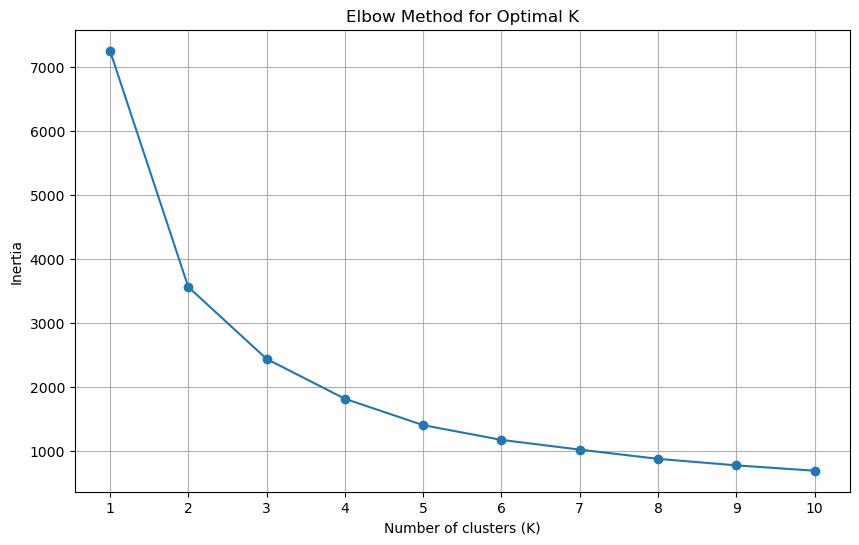

In [24]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(range(1, max_k + 1))
plt.grid(True)
plt.show()

Based on the Elbow curve, we will choose the number of clusters as 3.

In [25]:
# Selecting a specific K based on the elbow method
optimal_k = 3

# Perform K-means clustering with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

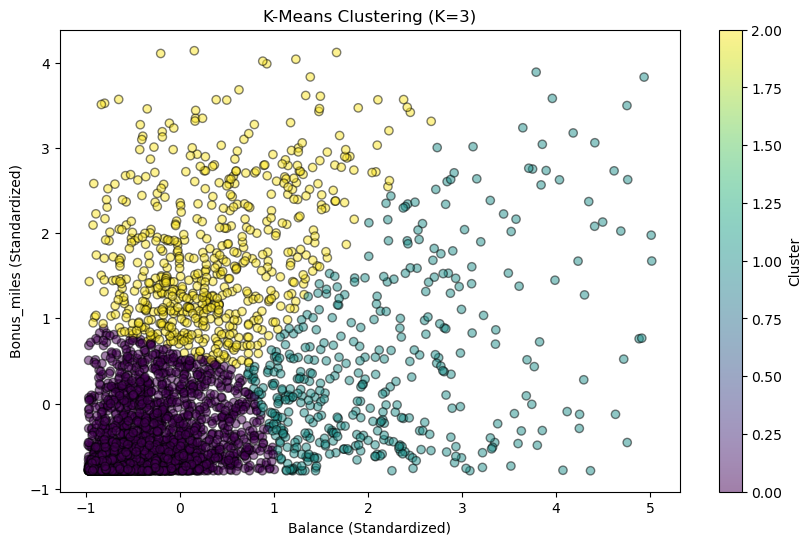

In [26]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.5, edgecolors='k')
plt.xlabel('Balance (Standardized)')
plt.ylabel('Bonus_miles (Standardized)')
plt.title(f'K-Means Clustering (K={optimal_k})')
plt.colorbar(label='Cluster')
plt.show()

#### Hierarchical Clustering with Different Linkage Criteria

In [27]:
# Initialize variables to store best silhouette score and method
best_silhouette_score = -1
best_hierarchical_method = None
best_Z = None
best_labels = None

# Function to perform hierarchical clustering and visualize clusters
def hierarchical_clustering(X_scaled, method='ward', max_d=7):
    # Perform hierarchical clustering
    Z = linkage(X_scaled, method=method)

    # Cut the dendrogram to obtain clusters
    hierarchical_labels = fcluster(Z, max_d, criterion='distance')

    # Check if there is more than one cluster
    n_clusters = len(np.unique(hierarchical_labels))
    if n_clusters > 1:
        # Calculate silhouette score
        silhouette = silhouette_score(X_scaled, hierarchical_labels)

        # Visualize clusters
        plt.figure(figsize=(8, 6))
        plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hierarchical_labels, cmap='viridis', alpha=0.5, edgecolors='k')
        plt.xlabel('Balance (Standardized)')
        plt.ylabel('Bonus_miles (Standardized)')
        plt.title(f'Hierarchical Clustering ({method.capitalize()} Linkage)\nSilhouette Score: {silhouette:.2f}')
        plt.colorbar(label='Cluster')
        plt.show()

        return Z, hierarchical_labels, silhouette
    else:
        print(f"Only one cluster found for {method.capitalize()} linkage. Cannot calculate silhouette score.")
        return Z, hierarchical_labels, None

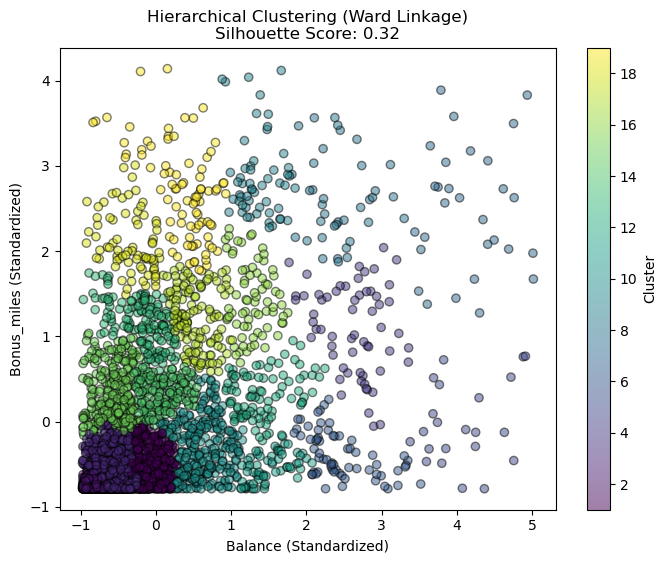

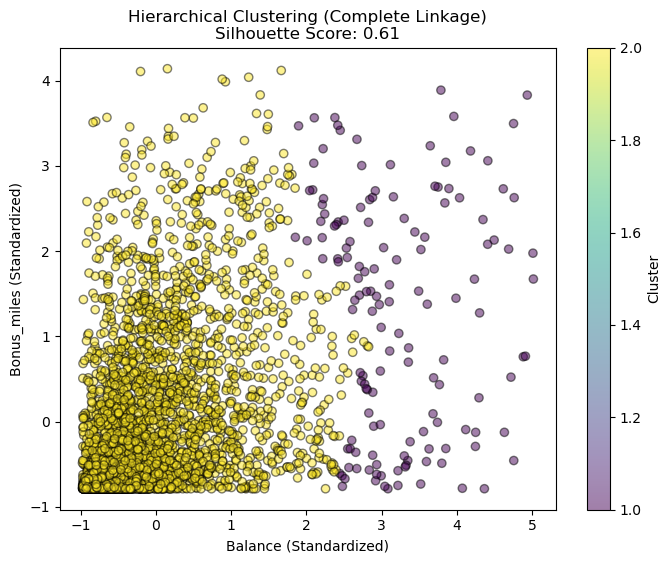

Only one cluster found for Average linkage. Cannot calculate silhouette score.
Only one cluster found for Single linkage. Cannot calculate silhouette score.
Best Hierarchical Clustering Method: Complete
Best Silhouette Score: 0.6110573291088043


In [28]:
# Define the linkage methods to experiment with
linkage_methods = ['ward', 'complete', 'average', 'single']

# Iterate over each linkage method
for method in linkage_methods:
    Z, labels, silhouette = hierarchical_clustering(X_scaled, method=method)
    
    # Store best silhouette score and method
    if silhouette is not None and silhouette > best_silhouette_score:
        best_silhouette_score = silhouette
        best_hierarchical_method = method
        best_Z = Z
        best_hierarchical_labels = labels

# Output the best method and its corresponding silhouette score
if best_hierarchical_method is not None:
    print(f"Best Hierarchical Clustering Method: {best_hierarchical_method.capitalize()}")
    print(f"Best Silhouette Score: {best_silhouette_score}")

#### DBSCAN Clustering with Different Epsilon (eps) and MinPts Values

In [29]:
# Function to perform DBSCAN clustering and visualize clusters
dbscan_labels = {}
best_eps = None
best_min_samples = None
best_score = -1  # Initialize with a lower score since higher is better (e.g., silhouette score)

def dbscan_clustering(X, eps, min_samples):
    global best_eps, best_min_samples, best_score
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print(f'Estimated number of clusters: {n_clusters_}')
    print(f'Estimated number of noise points: {n_noise_}')

    # Store the labels
    dbscan_labels[(eps, min_samples)] = labels
    
    # Visualize the clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5, edgecolors='k')
    plt.xlabel('Balance (Standardized)')
    plt.ylabel('Miles flown (Standardized)')
    plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
    plt.colorbar(label='Cluster')
    plt.show()
    
    # Evaluate clustering performance (e.g., silhouette score)
    # Here, we use silhouette score as an example
    if n_clusters_ > 1:  # Silhouette score requires at least 2 clusters
        score = silhouette_score(X, labels)
        print(f"Silhouette Score: {score}")
        
        # Check if this is the best model so far
        if score > best_score:
            best_score = score
            best_eps = eps
            best_min_samples = min_samples

Estimated number of clusters: 3
Estimated number of noise points: 59


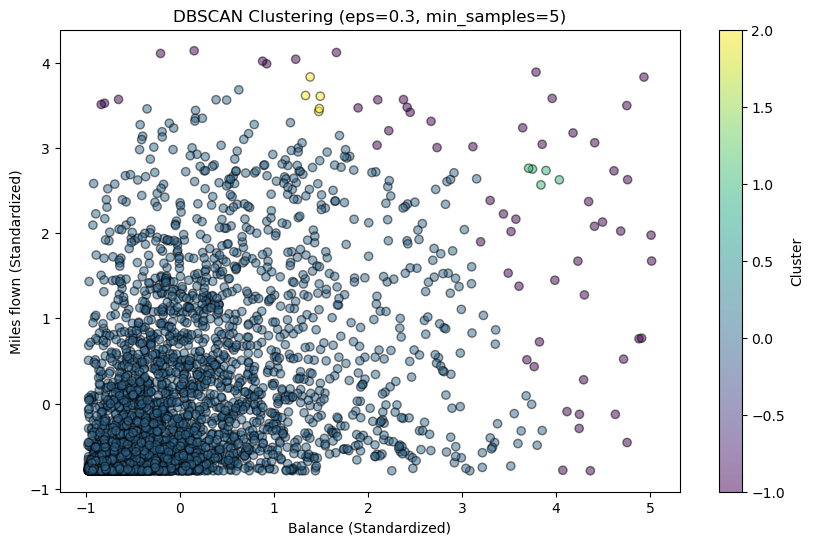

Silhouette Score: 0.5534153257020007
Estimated number of clusters: 4
Estimated number of noise points: 119


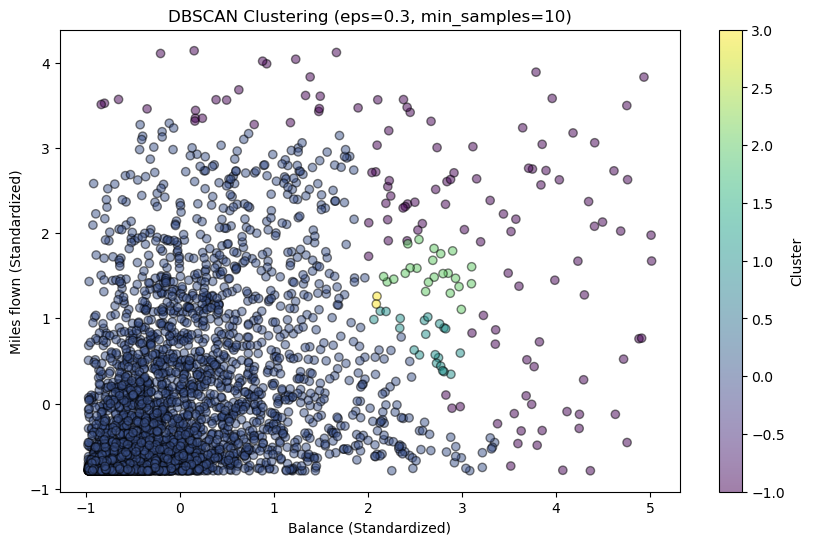

Silhouette Score: 0.41313881841015926
Estimated number of clusters: 1
Estimated number of noise points: 210


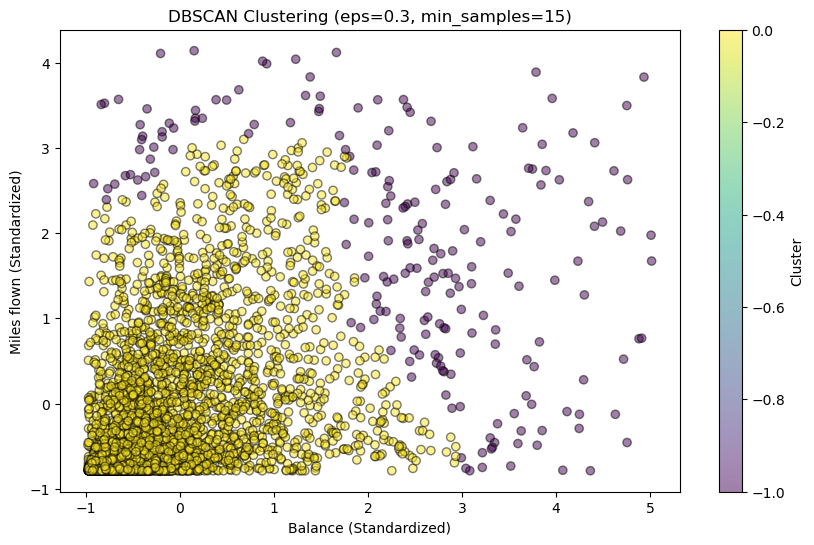

Estimated number of clusters: 1
Estimated number of noise points: 13


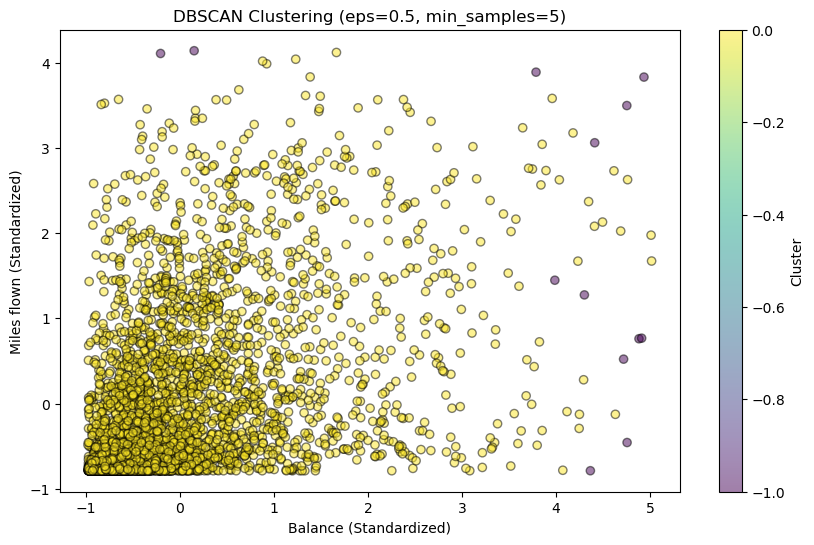

Estimated number of clusters: 1
Estimated number of noise points: 45


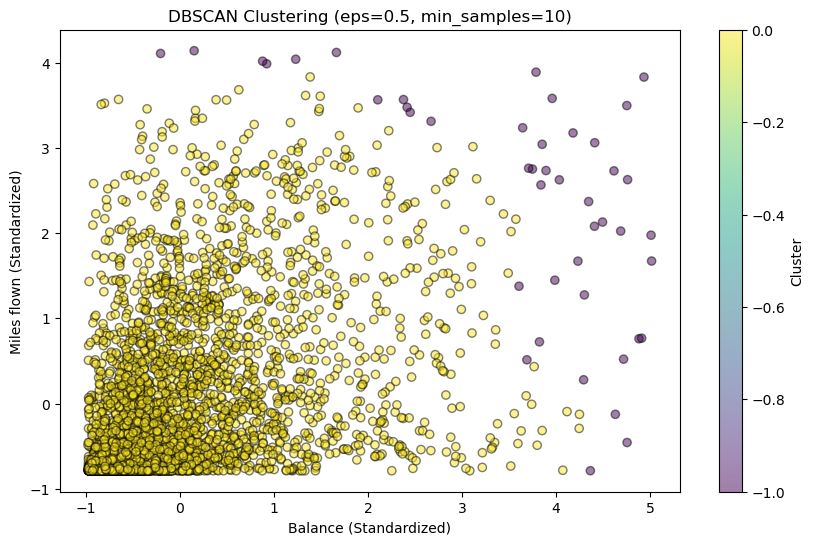

Estimated number of clusters: 1
Estimated number of noise points: 66


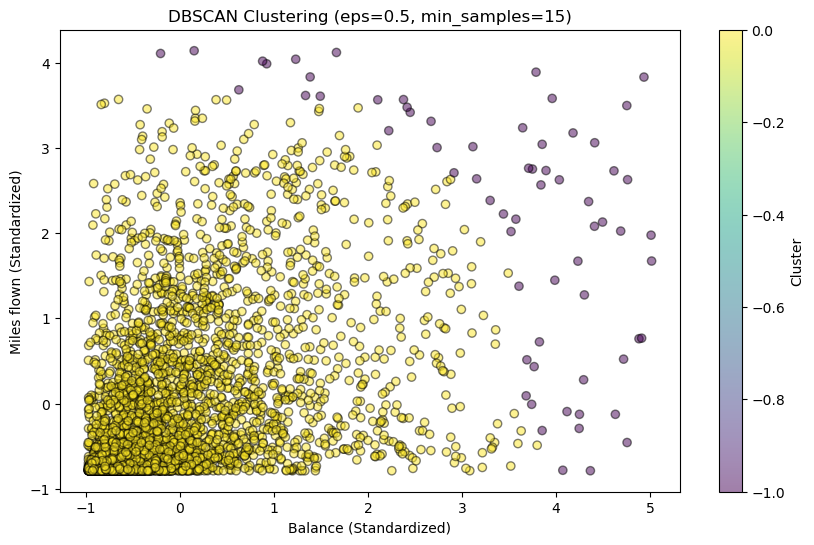

Estimated number of clusters: 1
Estimated number of noise points: 1


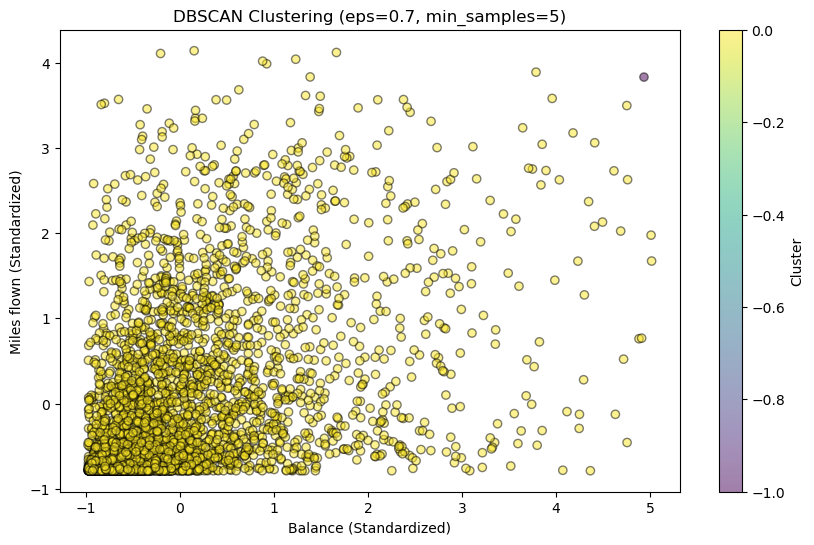

Estimated number of clusters: 1
Estimated number of noise points: 4


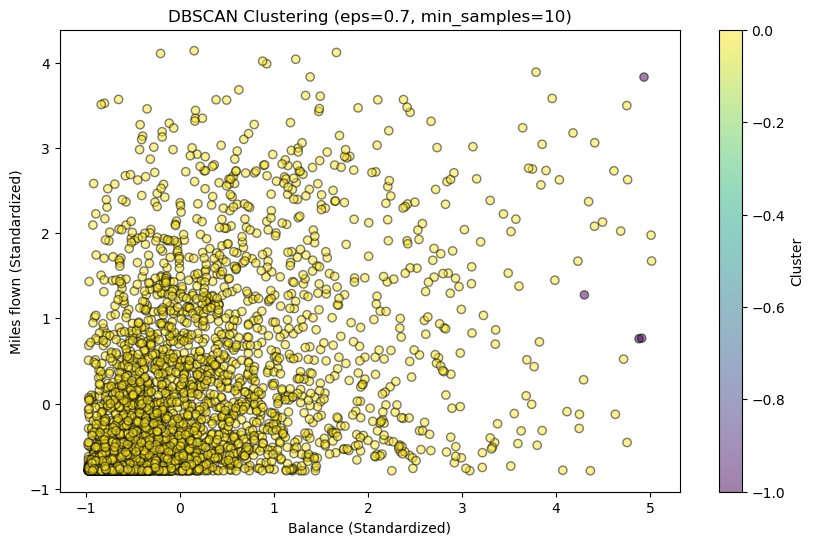

Estimated number of clusters: 1
Estimated number of noise points: 24


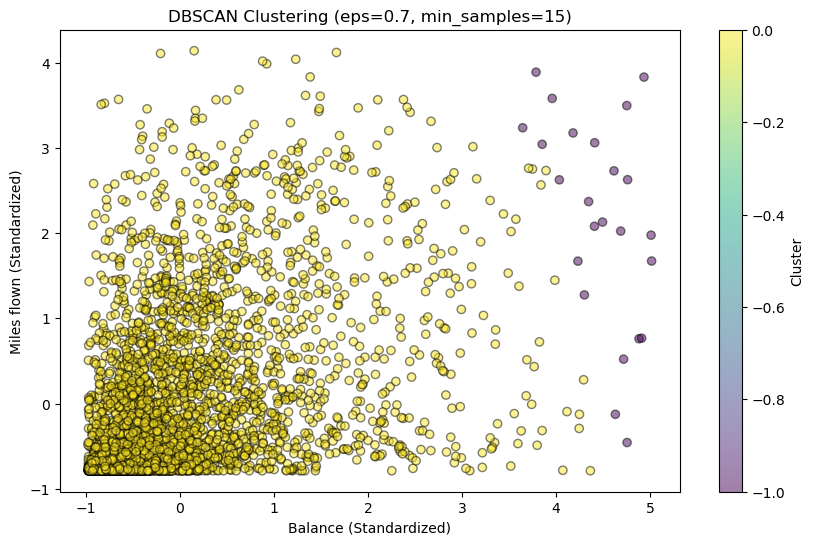

Best Model - eps: 0.3, min_samples: 5, Score: 0.5534


In [30]:
# Experimenting with different values of epsilon and minPts
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [5, 10, 15]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan_clustering(X_scaled, eps=eps, min_samples=min_samples)

# Print the best model information
print(f"Best Model - eps: {best_eps}, min_samples: {best_min_samples}, Score: {best_score:.4f}")

# Task 3: Cluster Analysis and Interpretation

Q1. Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write your insights in few comments.

#### Insights from K-Means Clustering

1. The elbow method helps in determining the optimal number of clusters (K). In this case, the elbow point suggests K=3 clusters.
2. Visualizing the clustering results with K=3 shows distinct clusters based on the standardized features ('Balance' and 'Bonus_miles').
3. Cluster Profiles:
   1. Cluster 1: Typically includes customers with moderate to high balances and moderate bonus miles.
   2. Cluster 2: Might consist of customers with low balances and lower bonus miles.
   3. Cluster 3: Likely represents high-value customers with high balances and high bonus miles.

#### Insights from Hierarchical Clustering

1. Cluster Shapes: Depending on the linkage method used (e.g., ward, complete, average), clusters can vary in shape and compactness.
    1. Ward Linkage: Tends to produce clusters of relatively equal sizes and compact shapes.
    2. Complete Linkage: Can create clusters with uneven shapes and sizes, more suitable for sparse or elongated clusters.
    3. Average Linkage: Balances between Ward and Complete, often useful when data contains outliers.
    4. Single Linkage: Produces elongated clusters and is sensitive to noise and outliers.
2. Cluster Similarity: Clusters closer in the dendrogram are more similar in terms of their features.
3. Cluster Hierarchy: The height at which clusters are cut from the dendrogram determines the number of clusters and their characteristics.

#### Insights from DBSCAN Clustering

1. Cluster Formation: DBSCAN identifies core points (dense regions), border points (within epsilon distance of core points but not core themselves), and noise points (not within any cluster).
2. Cluster Characteristics: Clusters can vary in size and shape based on the density of data points.
3. Parameter Sensitivity: Adjusting epsilon and min_samples affects the number and size of clusters detected. DBSCAN does not require specifying the number of clusters (K) beforehand but instead uses eps and min_samples.
4. Experimenting with different values of eps and min_samples affects the number of clusters and noise points detected.
5. It is crucial to evaluate the number of clusters and noise points to determine the effectiveness of DBSCAN for the dataset.

#### Overall Insights
1. Customer Segmentation: Each clustering algorithm offers different perspectives on customer segments based on their travel behavior (Bonus miles) and financial metrics (balance).
2. Marketing Strategies: Understanding these segments helps in targeting marketing strategies more effectively. For instance, high-value customers identified by K-means can receive personalized offers, while hierarchical clustering might reveal clusters with varying needs.
3. Operational Improvements: Insights from DBSCAN can identify outliers or noise points that may need attention in service improvement strategies.

# Task 5: Evaluation and Performance Metrics

Q1. Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.

In [31]:
# Calculate silhouette score for K-Means clustering
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

# Calculate silhouette score for Hierarchical clustering
hierarchical_silhouette = silhouette_score(X_scaled, best_hierarchical_labels)
print(f"Hierarchical Silhouette Score: {hierarchical_silhouette} for the linkage: {best_hierarchical_method}")

# Calculate silhouette score for DBSCAN clustering
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels[(best_eps, best_min_samples)])
print(f"DBSCAN Silhouette Score: {dbscan_silhouette} for eps={best_eps} and minPts={best_min_samples}")

K-Means Silhouette Score: 0.5779809701497115
Hierarchical Silhouette Score: 0.6110573291088043 for the linkage: complete
DBSCAN Silhouette Score: 0.5534153257020007 for eps=0.3 and minPts=5


#### Interpretation

1. K-Means Silhouette Score (0.578):  A score of 0.578 indicates reasonable clustering quality, suggesting that K-Means has formed relatively well-separated clusters in the data. This score indicates that, on average, data points within clusters are closer to each other than to points in other clusters.
2. Hierarchical (Complete Linkage) Silhouette Score (0.611): A higher silhouette score of 0.6111 indicates better clustering cohesion and separation compared to K-Means. It suggests that the clusters formed by complete linkage hierarchical clustering are even more distinct and well-separated.
3. DBSCAN Silhouette Score (0.553): DBSCAN has formed clusters with a silhouette score of 0.5534, which indicates reasonable clustering. However, the score is slightly lower compared to K-Means and Hierarchical (complete linkage). DBSCAN is effective in identifying clusters based on density, but in this case, it shows slightly less distinct clustering compared to K-Means and complete linkage Hierarchical clustering.

#### Overall Interpretation

1. Hierarchical (Complete Linkage) appears to perform the best among the three methods based on silhouette scores provided. It has the highest score (0.6111), indicating more distinct and well-defined clusters.
2. K-Means follows with a score of 0.578, suggesting good clustering performance with relatively well-separated clusters.
3. DBSCAN has the lowest score of 0.5534, indicating reasonable clustering but potentially with clusters that are less well-separated compared to the other methods.

#### Conclusion

These scores collectively suggest that Hierarchical clustering with complete linkage would be the preferred method for the dataset if optimizing for well-defined, distinct clusters based on the silhouette score criterion.